In [1]:
import sys,os,copy,glob
import numpy as np
sys.path.append(os.path.abspath('../smodels'))
sys.path.append(os.path.abspath('../'))
from builder.protomodel import ProtoModel
from builder.manipulator import Manipulator
from tester.predictor import Predictor
from tester.combiner import Combiner
from walker.hiscore import Hiscore
from smodels.experiment.databaseObj import Database
from smodels.tools import runtime
from smodels.tools.physicsUnits import fb
runtime._experimental = True
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from names import particleLabels
# sns.set() #Set style
# sns.set_style('ticks')
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
# sns.set_palette(sns.color_palette("Paired"))
sns.set_palette(sns.color_palette("deep"))


In [2]:
def getLikelihoods(protomodel,muvals,normalize=True):
    
    #Sort tpList
    critic = sorted(protomodel.tpList, key = lambda tp: tp[0], reverse = True)[0][2]

    #Combiner likelihood:
    combiner = Combiner(0)
    llhComb = np.array([combiner.getCombinedLikelihood(protomodel.bestCombo,mu) for mu in muvals])
    llhCombSM = combiner.getCombinedLikelihood(protomodel.bestCombo,0.)
    llhDict = {'Combined' : llhComb}
    llhDictSM = {'Combined' : llhCombSM}
    for tp in protomodel.bestCombo:
        llhDict[tp.expResult.globalInfo.id] = np.array([tp.getLikelihood(mu) for mu in muvals])
        llhDictSM[tp.expResult.globalInfo.id] = tp.getLikelihood(0.0)

    #Critic likelihood:
    if critic.getLikelihood(1.0) is not None:
        llhDictSM['Critic'] = critic.getLikelihood(0.0)
        llhDict['Critic'] = np.array([critic.getLikelihood(mu) for mu in muvals])
    else:
        llhDict['Critic'] = None
        llhDictSM['Critic'] = None
    llhDict['SM values'] = llhDictSM
    
    #Compute normalizations:
    if normalize:
        for key,llhd in llhDict.items():
            if key != 'SM values':
                norm = llhd.sum()
                llhDict[key] = llhd/norm
                llhDict['SM values'][key] *= 1/norm
    
    
    return llhDict


In [3]:
def fromDict(inputDict):
    
    p = ProtoModel(walkerid=0)
    for key,v in inputDict.items():
        setattr(p,key,copy.deepcopy(v))
        
    return p

In [4]:
#Get highest score from each run:
protomodelsDict = {}
for ff in glob.glob('../data/real4.dict'):
    with open(ff,'r') as f:
        pList = eval(f.read())
    run = eval(os.path.basename(ff).replace('real','').replace('.dict',''))
    pList = [fromDict(pDict) for pDict in pList[:]]
    p = sorted(pList, key = lambda p: p.K, reverse=True)[0]
    protomodelsDict[run] = p  

In [5]:
for run in sorted(protomodelsDict.keys()):
    print(run,protomodelsDict[run])
    
Kavg = np.array([p.K for p in protomodelsDict.values()]).mean()
Kstd = np.array([p.K for p in protomodelsDict.values()]).std()
print('K (avg) = %1.2f +- %1.2f' %(Kavg,Kstd))

4 ProtoModel (XZ1,Xc,Xt): K = 7.65, Z = 3.34
K (avg) = 7.65 +- 0.00


In [6]:
protomodel = protomodelsDict[4]
for pids, ssm in protomodel.ssmultipliers.items():
    if not ssm: continue
    print(pids,ssm)
print(protomodel.masses)    

(-1000004, 1000004) 2.662
(-1000004, -1000004) 2.662
(1000004, 1000022) 2.662
(-1000004, 1000022) 2.662
(1000006, 1000006) 1.001
(-1000006, 1000006) 1.001
(-1000006, -1000006) 1.001
(1000006, 1000022) 1.001
(-1000006, 1000022) 1.001
(1000004, 1000006) 1.001
(-1000006, 1000004) 1.001
(-1000004, 1000006) 1.001
(-1000006, -1000004) 1.001
{1000022: 507.27, 1000004: 930.037, 1000006: 792.759}


In [15]:
run = 4
p = protomodelsDict[run]
mXt = np.linspace(700.,900.,20)
pList = []
pred = Predictor(walkerid=0,dbpath='../official124_smodels200.pcl')
for mass in mXt:
    protomodel = copy.deepcopy(p)
    protomodel.masses[1000006] = mass
    #Get predictions:
    res = pred.predict(protomodel)
    pList.append(protomodel)
    print(mass,protomodel.K)

[combine:0] selected predictions down via SRs from 238 to 16.
[combine:0] sorting out subsets, reduced 643 -> 84 combinations.


combination #84/84 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:05


700.0 3.3443004601478266


[combine:0] selected predictions down via SRs from 256 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:11


710.5263157894736 3.5589875002735947


[combine:0] selected predictions down via SRs from 256 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:12


[combine:0] selected predictions down via SRs from 256 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:12


721.0526315789474 3.886195483542188


[combine:0] selected predictions down via SRs from 256 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:13


[combine:0] selected predictions down via SRs from 256 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:13


731.578947368421 3.943743415172541


[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:23


[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:22


742.1052631578948 5.046443159833634


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.


[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.


[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(8598.83) and eUL(3664.51) is too large (dr=0.40>0.40). capping to 8550.52.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(239.52) and eUL(102.08) is too large (dr=-0.40)
752.6315789473684 6.209523783321577


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7167.38) and eUL(2919.89) is too large (dr=0.42>0.40). capping to 6813.09.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(199.65) and eUL(81.33) is too large (dr=-0.42)
763.1578947368421 6.9322812078236


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
combination #252/252 100%||||||||||||||||||||||||||||||||||||||||

[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(166.85) and eUL(70.42) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5989.96) and eUL(2528.13) is too large (dr=0.41>0.40). capping to 5898.97.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

773.6842105263158 7.427031642218628


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5135.18) and eUL(2192.63) is too large (dr=0.40>0.40). capping to 5116.14.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.04) and eUL(61.08) is too large (dr=-0.40)
784.2105263157895 7.7827040069317


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:32


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:33


794.7368421052631 7.550053047768278


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


805.2631578947369 6.69569883227295


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:21


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:21


815.7894736842105 6.1953192613597965


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:21


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:21


826.3157894736842 5.869051741506593


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:21


836.8421052631579 5.641213969320403


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


847.3684210526316 5.265560085598932


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


857.8947368421052 4.658372728892343


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:19


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:18


868.421052631579 4.520734916750297


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:19


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:19


878.9473684210527 4.347920373395749


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


combination #192/192 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


889.4736842105264 3.9103642643149046


[combine:0] selected predictions down via SRs from 242 to 17.
[combine:0] sorting out subsets, reduced 1386 -> 192 combinations.


900.0 3.707649814822436


In [18]:
kvalues = [pp.K for pp in pList]

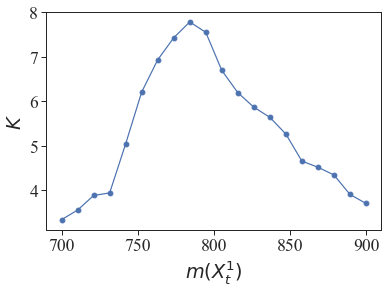

In [19]:
plt.plot(mXt,kvalues,'o-')
plt.xlabel(r'$m(X_t^1)$')
plt.ylabel(r'$K$')
plt.savefig('KvsMXt.png')
plt.show()

In [20]:
run = 4
p = protomodelsDict[run]
mZ = np.linspace(450.,600.,30)
pList2 = []
pred = Predictor(walkerid=0,dbpath='../official124_smodels200.pcl')
for mass in mZ:
    protomodel = copy.deepcopy(p)
    protomodel.masses[1000022] = mass
    #Get predictions:
    res = pred.predict(protomodel)
    pList2.append(protomodel)

[combine:0] selected predictions down via SRs from 264 to 20.
[combine:0] sorting out subsets, reduced 3003 -> 324 combinations.


combination #324/324 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:31


[combine:0] selected predictions down via SRs from 264 to 20.
[combine:0] sorting out subsets, reduced 3003 -> 324 combinations.


combination #324/324 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:32


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:24


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:25


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:30


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:26


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:26


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:26


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:25


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:25


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:28


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:28


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:26
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:26
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(143.65) and eUL(61.08) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5157.19) and eUL(2192.70) is too large (dr=0.40>0.40). capping to 5116.30.
combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). cappi

[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:25


[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(5785.00) and eUL(2372.24) is too large (dr=0.42>0.40). capping to 5535.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(161.14) and eUL(66.08) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.


[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.


[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:27
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.


[combine:0] selected predictions down via SRs from 262 to 19.


[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6407.81) and eUL(2611.08) is too large (dr=0.42>0.40). capping to 6092.53.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(178.49) and eUL(72.73) is too large (dr=-0.42)



WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.


[combine:0] selected predictions down via SRs from 260 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.


[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.


[combine:0] selected predictions down via SRs from 260 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.


[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)
[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6829.33) and eUL(2801.32) is too large (dr=0.42>0.40). capping to 6536.42.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(190.23) and eUL(78.03) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.


[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.


[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)
[combine:0] asking for likelihood from limit but difference between oUL(195.85) and eUL(81.67) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7030.96) and eUL(2931.95) is too large (dr=0.41>0.40). capping to 6841.23.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:25


[combine:0] selected predictions down via SRs from 258 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:24


[combine:0] selected predictions down via SRs from 254 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:28


[combine:0] selected predictions down via SRs from 254 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:29


[combine:0] selected predictions down via SRs from 256 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:30


[combine:0] selected predictions down via SRs from 256 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:29


[combine:0] selected predictions down via SRs from 256 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:30


[combine:0] selected predictions down via SRs from 256 to 19.
[combine:0] sorting out subsets, reduced 2356 -> 252 combinations.


combination #252/252 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:33


[combine:0] selected predictions down via SRs from 254 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:18


[combine:0] selected predictions down via SRs from 254 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:17


[combine:0] selected predictions down via SRs from 254 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:16


[combine:0] selected predictions down via SRs from 254 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:14


[combine:0] selected predictions down via SRs from 254 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:14


[combine:0] selected predictions down via SRs from 256 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:16


[combine:0] selected predictions down via SRs from 256 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:18


[combine:0] selected predictions down via SRs from 254 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:16
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.


[combine:0] selected predictions down via SRs from 254 to 18.
[combine:0] sorting out subsets, reduced 1565 -> 126 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: ask

[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)
[combine:0] asking for likelihood from limit but difference between oUL(327.09) and eUL(139.82) is too large (dr=-0.40)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(11742.69) and eUL(5019.70) is too large (dr=0.40>0.40). capping to 11712.64.
combination #126/126 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:18


[combine:0] selected predictions down via SRs from 234 to 16.
[combine:0] sorting out subsets, reduced 643 -> 84 combinations.


combination #84/84 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:06


[combine:0] selected predictions down via SRs from 234 to 16.
[combine:0] sorting out subsets, reduced 643 -> 84 combinations.


combination #84/84 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:10


In [21]:
kvalues2 = [pp.K for pp in pList2]

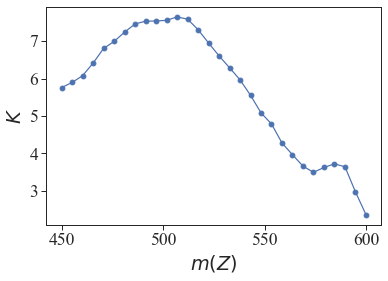

In [22]:
plt.plot(mZ,kvalues2,'o-')
plt.xlabel(r'$m(Z)$')
plt.ylabel(r'$K$')
plt.savefig('KvsMZ.png')
plt.show()